In [1]:
# https://www.datacamp.com/tutorial/random-forests-classifier-python

import pandas as pd
import numpy as np

# data_handle = 'cond1_pat59to74'
# data_handle = 'cond1_pat1to81'
# data_handle = 'cond1_oversampled'
data_handle = 'cond1_pat1to81_outrmv'
data_handle = 'cond1_oversampled_outrmv'
pca_mode = 'pca'

inter_dir = '../../data/intermediates'
data_subdir = pca_mode + '_' + data_handle
data_dir = inter_dir + '/' + data_subdir

fX_test = data_dir + '/X_test_' + data_handle + '.csv'
fX_train = data_dir + '/X_train_' + data_handle + '.csv'
fy_test = data_dir + '/y_test_' + data_handle + '.csv'
fy_train = data_dir + '/y_train_' + data_handle + '.csv'

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
X_test = np.loadtxt(fX_test, delimiter=',')
X_train = np.loadtxt(fX_train, delimiter=',')
y_test = pd.read_csv(fy_test)
y_train = pd.read_csv(fy_train)

print('---- X_test ----')
print(X_test, '\n')
print('---- X_train ----')
print(X_train, '\n')
print('---- y_test ----')
display(y_test)
print('---- y_train ----')
display(y_train)

---- X_test ----
[[ 5.28233890e+01  5.34537938e+01  1.93351627e+01 -1.28438416e+01
  -7.69787570e-02  3.50103781e+01 -8.49565374e+00 -3.00797170e+01
   4.89296799e+01  1.82528159e+01  4.92840739e+01  3.52819909e+01
  -2.21855563e+01  2.51485163e-01 -1.85575790e+01  1.61557217e+01
   2.77773125e+01 -1.15576255e+01  2.52648074e+01  4.29379754e+00
   1.68187973e+00 -1.78307278e+01  1.02868270e+00  1.00076408e+01
  -9.14593113e-02  1.58713921e+01 -1.32060304e+01  2.18094582e+01
   8.37825029e+00  9.04817374e+00 -9.34880846e+00 -8.60655340e+00
  -4.32088608e+00 -1.36201293e+01  8.26014807e+00 -6.72280200e+00
  -6.89270086e+00 -1.01886615e+01 -8.70077639e+00  5.46086769e+00
  -8.09241217e+00 -1.68318993e+01  8.13949786e+00 -3.15151094e+00
  -1.49733431e+01  5.11669755e+00 -7.48453338e-01  1.31843933e+01
  -4.71331050e+00 -2.89329644e+01 -1.28614051e+01  7.52608833e+00
  -8.40945860e-01 -1.44209330e+01  1.68040833e+01  5.76350541e+00
  -8.25348647e+00 -5.65272303e+00  9.81556751e+00 -6.020119

,subject,class
0,78,1
1,45,1
2,20,0
3,48,1
4,12,0
5,21,0
6,67,1
7,42,1
8,49,1
9,39,1


---- y_train ----


,subject,class
0,65,0
1,11,0
2,64,0
3,24,0
4,15,0
5,72,1
6,69,1
7,3,0
8,19,0
9,13,0


In [4]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train['class'])

CPU times: user 941 ms, sys: 169 ms, total: 1.11 s
Wall time: 1.1 s


RandomForestClassifier()

In [5]:
y_pred = rf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test['class'], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625


In [7]:
%%time

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {'n_estimators': randint(1, 500), 'max_depth': randint(1, 20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search.fit(X_train, y_train['class'])

CPU times: user 12.1 s, sys: 131 ms, total: 12.2 s
Wall time: 12.6 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1268ae550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1106b02e0>})

In [8]:
best_est = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:', best_params)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 350}


In [9]:
%%time
rf_best = RandomForestClassifier(max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'])
# rf_best = RandomForestClassifier(max_depth=100, n_estimators=4)  # inconsistent results upon repeat
rf_best.fit(X_train, y_train['class'])
y_pred_best = rf_best.predict(X_test)
accuracy_best = accuracy_score(y_test['class'], y_pred_best)
print("Best accuracy:", accuracy_best)

Best accuracy: 0.625
CPU times: user 621 ms, sys: 8.29 ms, total: 629 ms
Wall time: 631 ms


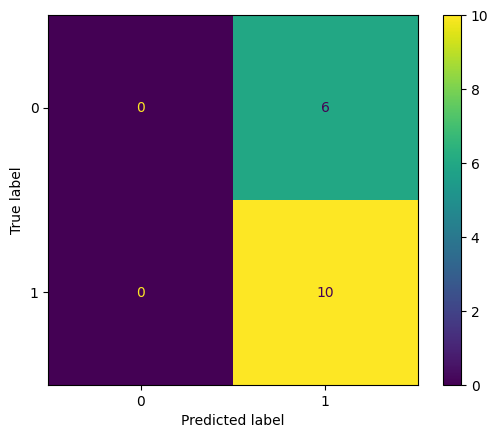

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test['class'], y_pred_best)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [11]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test['class'], y_pred)
recall = recall_score(y_test['class'], y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1:", 2*precision*recall/(precision + recall))

Precision: 0.625
Recall: 1.0
F1: 0.7692307692307693


In [ ]:
# F- I-- N---